In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [2]:


image_file = "goerlitz1.jpg"
# img = imp.get_image(image_file)

img = cv2.cvtColor(cv2.imread(image_file), cv2.COLOR_BGR2RGB)



res = img.shape[:-1]
radius = 120

# saliency map image preparation
xx, yy =  np.meshgrid(np.arange(-radius, radius+1), np.arange(-radius, radius+1))


scale = 1.21e-3*.2
mu = 0
X = np.linspace(0, radius)
Y = np.exp(-(X - mu)*(X - mu)*scale)

if 0:
    plt.plot(X, Y)
    plt.ylim(0, 1)
    plt.show()

# calculate gaussian bell
bell = np.exp(-((xx - mu)*(xx - mu)+(yy - mu)*(yy - mu))*scale)
bell.shape


(241, 241)

In [3]:
test_img = np.zeros((*res, 4), dtype=np.uint8)
test_img[:, :, 1] = 150
test_img[:, :300, 0] = 150
test_img[:300, :, 2] = 150
test_img[:, :, 3] = 255

if 0: 
    plt.imshow(test_img[:, :, :-1])

In [4]:
def merge(bg, overlay, alpha_max=0.7):
    """
    merge two RGBA images
    """
    
    # assume bg has full opacity everywhere
    
    alpha = overlay[:, :, 3:]*alpha_max
    merged = bg[:, :, :3].astype(float)*(255-alpha)/255 + overlay[:, :, :3].astype(float)*alpha/255
    return merged.astype(np.uint8)

m = merge(test_img, test_img)

In [5]:
if 0:
    plt.imshow(test_img)

    q = test_img[0, 0, :].astype(float)*test_img[:, :, 3:]/255
    q

In [6]:
def add_gaussian_bell_to_image(img, x, y):
    """
    place precomputed bell to specific place on the image
    """
    
    assert 0 <= x < res[0]
    assert 0 <= y < res[1]
    
    # account for margin
    x += radius
    y += radius
    
    idx_x1 = x - radius
    idx_x2 = x + radius + 1
    
    idx_y1 = y - radius
    idx_y2 = y + radius + 1
    
    img[idx_x1:idx_x2, idx_y1: idx_y2] += bell



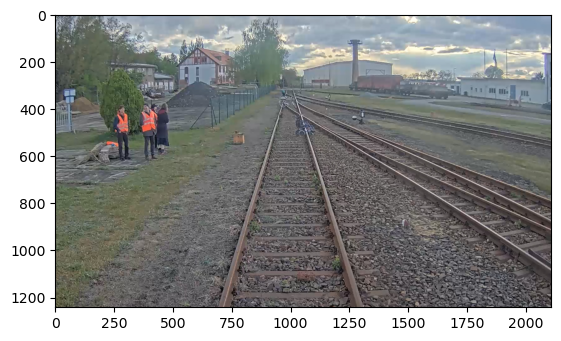

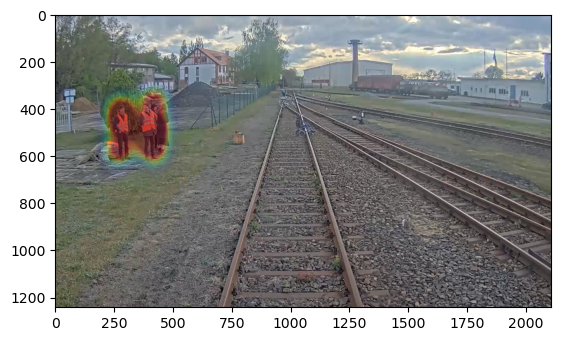

In [7]:
image_with_margin = np.zeros((res[0] + 2*radius, res[1] + 2*radius))


add_gaussian_bell_to_image(image_with_margin, 370, 420)
add_gaussian_bell_to_image(image_with_margin, 480, 430)
add_gaussian_bell_to_image(image_with_margin, 500, 380)
add_gaussian_bell_to_image(image_with_margin, 580, 270)
add_gaussian_bell_to_image(image_with_margin, 580, 420)
add_gaussian_bell_to_image(image_with_margin, 470, 280)
add_gaussian_bell_to_image(image_with_margin, 400, 280)

smap_data = image_with_margin[radius:-radius, radius:-radius]

cmap = plt.get_cmap("jet")
# Create a colormap array with the same shape as datamap
smap = cmap(smap_data)


# use the data also as alpha channel
smap[: , :, 3] = smap_data

# plt.imshow((smap.clip(0, 1)*255).astype(np.uint8))
# plt.imshow(smap)


plt.imshow(img)
plt.figure()
if 1:
    m = merge(img, (smap.clip(0, 1)*255).astype(np.uint8), alpha_max=0.4)
    plt.imshow(m)